In [1]:
import pandas as pd

df=pd.read_csv('c:/data/text/ratings_all.csv',encoding='ms949')
df.head()

,document,label
0,아 더빙.. 진짜 짜증나네요 목소리,0
1,흠...포스터보고 초딩영화줄....오버연기조차 가볍지 않구나,1
2,너무재밓었다그래서보는것을추천한다,0
3,교도소 이야기구먼 ..솔직히 재미는 없다..평점 조정,0
4,사이몬페그의 익살스런 연기가 돋보였던 영화!스파이더맨에서 늙어보이기만 했던 커스틴 ...,1


0    100000
1    100000
Name: label, dtype: int64


<AxesSubplot:>

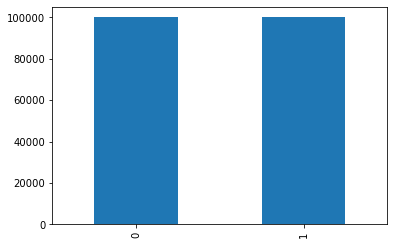

In [2]:
print(df['label'].value_counts())
df['label'].value_counts().plot(kind='bar')

In [3]:
import re

text='I am a boy.#,:;!$! 나는 1234 소년이다.'
re.sub('[^a-zA-Z ]','',text) 

'I am a boy   '

In [5]:
df['document']=df['document'].str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣]","")
df[:5]

<ipython-input-5-03c9a54b4a71>:1: FutureWarning: The default value of regex will change from True to False in a future version.
  df['document']=df['document'].str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣]","")


,document,label
0,아더빙진짜짜증나네요목소리,0
1,흠포스터보고초딩영화줄오버연기조차가볍지않구나,1
2,너무재밓었다그래서보는것을추천한다,0
3,교도소이야기구먼솔직히재미는없다평점조정,0
4,사이몬페그의익살스런연기가돋보였던영화스파이더맨에서늙어보이기만했던커스틴던스트가너무나도이...,1


In [6]:
import numpy as np
df['document'].replace('',np.nan, inplace=True)
print(df.isnull().sum())

document    1713
label          0
dtype: int64


In [7]:
df.loc[df.document.isnull()][:5]

,document,label
404,NaN,0
412,NaN,1
470,NaN,1
584,NaN,0
593,NaN,0


In [8]:
print(len(df))
df=df.dropna(how='any')
print(len(df))

200000
198287


In [9]:
X=df[['document']]
y=df['label']
print(X[:3])
print(y[:3])

                  document
0            아더빙진짜짜증나네요목소리
1  흠포스터보고초딩영화줄오버연기조차가볍지않구나
2        너무재밓었다그래서보는것을추천한다
0    0
1    1
2    0
Name: label, dtype: int64


In [11]:
from imblearn.under_sampling import RandomUnderSampler
X_sample,y_sample=RandomUnderSampler(random_state=0).fit_resample(X,y)
X_samp=pd.DataFrame(data=X_sample,columns=['document'])
y_samp=pd.DataFrame(data=y_sample,columns=['label'])
df_samp=pd.concat([X_samp,y_samp],axis=1)

In [12]:
df_samp['label'].value_counts()

0    99071
1    99071
Name: label, dtype: int64

In [13]:
stopwords=['의','가','이','은','들','는','좀','잘','걍','과',
'도','를','으로','자','에','와','한','하다']

In [14]:
from konlpy.tag import Okt
okt=Okt()
okt.morphs('아버지가 방에 들어가신다',stem=True)

['아버지', '가', '방', '에', '들어가다']

In [15]:
X = []
y = []
for idx,sentence in enumerate(df['document'][:1000]):
    temp = []
    temp = okt.morphs(sentence, stem=True)
    temp = [word for word in temp if not word in stopwords]
    X.append(temp)
    y.append(df.iloc[idx,1])

In [16]:
print(X[:3])
print(y[:3])

[['아더', '빙', '진짜', '짜증나다', '목소리'], ['흠', '포스터', '보고', '초딩', '영화', '줄', '오버', '연기', '조차', '가볍다', '않다'], ['너', '무재', '밓었', '다그', '래서', '보다', '추천', '다']]
[0, 1, 0]


In [17]:
from tensorflow.keras.preprocessing.text import Tokenizer
tokenizer=Tokenizer()
tokenizer.fit_on_texts(X)

In [18]:
i=0
for word in list(tokenizer.word_index.keys()):
    print(word,'==>',tokenizer.word_index[word])
    i+=1
    if i>5: break

영화 ==> 1
보다 ==> 2
을 ==> 3
없다 ==> 4
이다 ==> 5
하 ==> 6


In [19]:
threshold=3
total_cnt=len(tokenizer.word_index)
rare_cnt=0
total_freq=0
rare_freq=0

for key,value in tokenizer.word_counts.items():
    total_freq += value
    if value < threshold:
        rare_cnt+=1
        rare_freq += value

print('단어 집합 의 크기(vocabulary) :',total_cnt) 
print('출현 빈도가 %s 번 이하인 희귀 단어의 수: %s'%(threshold - 1, rare_cnt))
print("단어 집합에서 희귀 단어의 비율:", (rare_cnt / total_cnt)*100)


단어 집합 의 크기(vocabulary) : 3485
출현 빈도가 2 번 이하인 희귀 단어의 수: 2679
단어 집합에서 희귀 단어의 비율: 76.87230989956959


In [20]:
vocab_size = total_cnt - rare_cnt + 1
print('단어 집합의 크기 :',vocab_size) 

단어 집합의 크기 : 807


In [21]:
tokenizer = Tokenizer(vocab_size)
tokenizer.fit_on_texts(X)
i=0
for word in list(tokenizer.word_index.keys()):
    print(word,'==>',tokenizer.word_index[word])
    i+=1
    if i>5: break

영화 ==> 1
보다 ==> 2
을 ==> 3
없다 ==> 4
이다 ==> 5
하 ==> 6


In [23]:
X2=tokenizer.texts_to_sequences(X)
print(X[:3])
print(X2[:3])

[['아더', '빙', '진짜', '짜증나다', '목소리'], ['흠', '포스터', '보고', '초딩', '영화', '줄', '오버', '연기', '조차', '가볍다', '않다'], ['너', '무재', '밓었', '다그', '래서', '보다', '추천', '다']]
[[11, 162], [211, 29, 567, 1, 283, 568, 21, 569, 27], [239, 284, 2, 285, 8]]


In [24]:
for index, sentence in enumerate(X2[:10]):
    print(index,sentence)

0 [11, 162]
1 [211, 29, 567, 1, 283, 568, 21, 569, 27]
2 [239, 284, 2, 285, 8]
3 [137, 105, 45, 4, 58]
4 [28, 21, 570, 1, 24, 571, 212, 213, 448, 348, 212]
5 [449, 572, 450, 573, 138, 1, 81, 98, 42, 183]
6 [286, 287, 574, 349]
7 [98, 42, 32, 21, 575, 451, 12, 452, 23, 576, 453, 577, 18, 578, 578, 48, 454, 4, 21, 66, 6, 25, 18, 59]
8 [113, 4, 37, 455, 89, 1]
9 [58, 240, 18, 241, 350, 456, 13]


In [25]:
drop_X = [index for index, sentence in enumerate(X2) if len(sentence) < 1]
drop_X[:10]

[27, 28, 106, 166, 169, 287, 398, 399, 414, 486]

In [26]:
X_text = np.delete(X, drop_X, axis=0)
X = np.delete(X2, drop_X, axis=0)
y = np.delete(y, drop_X, axis=0)
print(X.shape)
print(y.shape)

(983,)
(983,)


C:\anaconda3\lib\site-packages\numpy\core\_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


리뷰의 최대 길이: 38
리뷰의 평균 길이 : 7.93794506612411


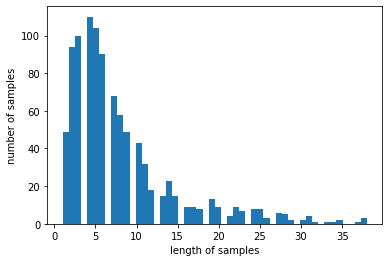

In [27]:
import matplotlib.pyplot as plt
max_len=max(len(l) for l in X)
print('리뷰의 최대 길이:',max_len) 
print('리뷰의 평균 길이 :',sum(map(len, X))/len(X)) 
plt.hist([len(s) for s in X], bins=50)
plt.xlabel('length of samples')
plt.ylabel('number of samples')
plt.show()

In [28]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
X=pad_sequences(X,maxlen=max_len)
X[0]

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  11, 162])

In [29]:
print(X.shape)
print(y.shape)

(983, 38)
(983,)


In [30]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,
test_size=0.2, stratify=y, random_state=10)

In [31]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(786, 38)
(197, 38)
(786,)
(197,)


In [32]:
from tensorflow.keras.layers import Embedding, Dense, LSTM
from tensorflow.keras.models import Sequential

model=Sequential()
model.add(Embedding(vocab_size, 100))
model.add(LSTM(128))
model.add(Dense(1,activation='sigmoid',name='output'))
model.compile(optimizer='rmsprop',loss='binary_crossentropy',metrics=['accuracy'])

In [33]:
hist=model.fit(X_train,y_train,epochs=15,batch_size=60,validation_split=0.2)

Epoch 1/15
11/11 [==============================] - 3s 87ms/step - loss: 0.6955 - accuracy: 0.5211 - val_loss: 0.6843 - val_accuracy: 0.6709
Epoch 2/15
11/11 [==============================] - 0s 39ms/step - loss: 0.6665 - accuracy: 0.7730 - val_loss: 0.6386 - val_accuracy: 0.7025
Epoch 3/15
11/11 [==============================] - 1s 58ms/step - loss: 0.5807 - accuracy: 0.8030 - val_loss: 0.5957 - val_accuracy: 0.7089
Epoch 4/15
11/11 [==============================] - 0s 35ms/step - loss: 0.4743 - accuracy: 0.8582 - val_loss: 0.5802 - val_accuracy: 0.7025
Epoch 5/15
11/11 [==============================] - 0s 43ms/step - loss: 0.4027 - accuracy: 0.8841 - val_loss: 0.5642 - val_accuracy: 0.7278
Epoch 6/15
11/11 [==============================] - 0s 39ms/step - loss: 0.3337 - accuracy: 0.8836 - val_loss: 0.6104 - val_accuracy: 0.6899
Epoch 7/15
11/11 [==============================] - 0s 35ms/step - loss: 0.3388 - accuracy: 0.8928 - val_loss: 0.5651 - val_accuracy: 0.7532
Epoch 8/15
11

In [34]:
scores=model.evaluate(X_test, y_test[:X_test.shape[0]],verbose=0)
print(scores)

[0.7518070936203003, 0.7360405921936035]


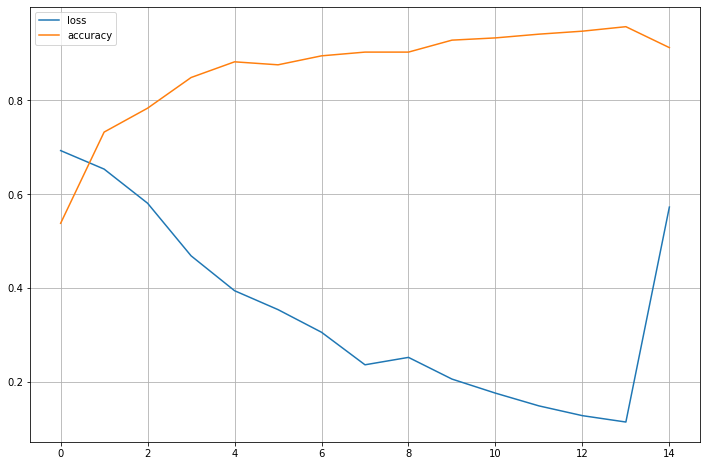

In [35]:
plt.figure(figsize=(12,8))
plt.plot(hist.history['loss'])
plt.plot(hist.history['accuracy']) 
plt.legend(['loss','accuracy'])
plt.grid()
plt.show()